# HOG of image:

In [88]:
# imports
import os
from os import listdir
from os.path import isfile, join

import numpy as np
from scipy import stats
import pickle

import pandas as pd
from skimage import (io, feature, color, exposure)
from skimage.transform import resize
import matplotlib.pyplot as plt

%matplotlib inline

In [163]:
# consts:
dataset_path = '/Users/nikhilarora/data/fydp/dataset'
car_b_path = '/Users/nikhilarora/data/fydp/dataset/car_os'
ncar_b_path = '/Users/nikhilarora/data/fydp/dataset/ncar_os'
#model_path = '/Users/nikhilarora/dev/github/fydp-codebase/models/finalized_model.p'
model_path = '/Users/nikhilarora/data/fydp/models/finalized_model.p'

In [164]:
class Classifier(object):
    """Classifier class that will hold the model and its actions
    Params
    ------
    - cfg_classifier
    - serial_path
    - model
    Methods
    -------
    - bool:predict(feat_vect)
    - sklearn_model:_init_model()
    """
    def __init__(self, clf_path):
        self.clf_path = clf_path
        self.model = self._init_model()

    def _init_model(self):
        """reads serialized model back to mem."""
        return pickle.load(open(self.clf_path, 'rb'))

    def predict(self, feat_vect):
        """returns prediction based on current model"""
        pred_val = self.model.predict(feat_vect)
        if type(pred_val) == list:
            return bool(pred_val[0])
        else:
            return bool(pred_val)


In [165]:
clf = Classifier(model_path)

In [166]:
# get all files from dir:
carfiles = [f for f in listdir(car_b_path) if isfile(join(car_b_path, f))]
ncarfiles = [f for f in listdir(ncar_b_path) if isfile(join(ncar_b_path, f))]

In [167]:
# read files into image list:
car_imgs = [io.imread(join(car_b_path, f)) for f in carfiles]
ncar_imgs = [io.imread(join(ncar_b_path, f)) for f in ncarfiles]

In [168]:
# define container to store hog feature vect and label
feature_vs = []
lbls = []

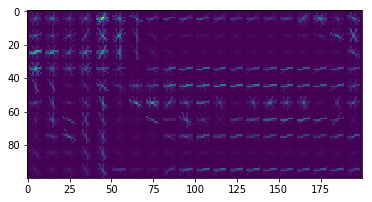

In [169]:
# first process event instances
for im in car_imgs:

    gray = color.rgb2gray(im)
    # NOTE: might need to do the whole contour thing, can see later...
    gray_rs = resize(gray, (100, 200), mode='constant')
    plt.imshow(gray_rs,cmap='gray')


    (H, hogImage) = feature.hog(gray_rs, orientations=9, pixels_per_cell=(10, 10),\
            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualise=True)
    feature_vs.append(H)
    lbls.append(True)

    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    plt.imshow(hogImage)
    #     cl = 1
    #     feature_vs.append(H)
    #     lbls.append(cl)

    # # extract Histogram of Oriented Gradients from the test image and
    # # predict the make of the car
    # (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
    #     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
    # 	pred = model.predict(H.reshape(1, -1))[0]

    # 	# visualize the HOG image
    # 	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    # 	hogImage = hogImage.astype("uint8")
    # 	cv2.imshow("HOG Image", hogImage)

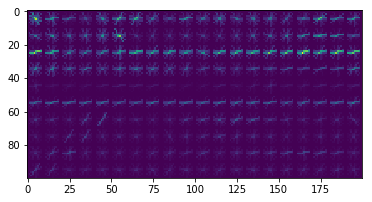

In [170]:
# then process non-event instances
for im in ncar_imgs:

    gray = color.rgb2gray(im)
    # NOTE: might need to do the whole contour thing, can see later...
    gray_rs = resize(gray, (100, 200), mode='constant')
    plt.imshow(gray_rs,cmap='gray')


    (H, hogImage) = feature.hog(gray_rs, orientations=9, pixels_per_cell=(10, 10),\
            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualise=True)
    feature_vs.append(H)
    lbls.append(False)

    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    plt.imshow(hogImage)
    #     cl = 1
    #     feature_vs.append(H)
    #     lbls.append(cl)

    # # extract Histogram of Oriented Gradients from the test image and
    # # predict the make of the car
    # (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
    #     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
    # 	pred = model.predict(H.reshape(1, -1))[0]

    # 	# visualize the HOG image
    # 	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    # 	hogImage = hogImage.astype("uint8")
    # 	cv2.imshow("HOG Image", hogImage)

In [171]:
for i, H in enumerate(feature_vs):
    print('Prediction of {}: '.format(str(i)), str(clf.predict(H.reshape(1, -1))), ' lbl: ', str(lbls[i]))

Prediction of 0:  True  lbl:  True
Prediction of 1:  True  lbl:  True
Prediction of 2:  True  lbl:  True
Prediction of 3:  True  lbl:  True
Prediction of 4:  True  lbl:  True
Prediction of 5:  True  lbl:  True
Prediction of 6:  True  lbl:  True
Prediction of 7:  True  lbl:  True
Prediction of 8:  True  lbl:  True
Prediction of 9:  True  lbl:  False
Prediction of 10:  True  lbl:  False
Prediction of 11:  True  lbl:  False
Prediction of 12:  True  lbl:  False
Prediction of 13:  True  lbl:  False
Prediction of 14:  True  lbl:  False


In [153]:
def predict_im(im):
    gray = color.rgb2gray(im)
    # NOTE: might need to do the whole contour thing, can see later...
    gray_rs = resize(gray, (100, 200), mode='constant')
    (H, hogImage) = feature.hog(gray_rs, orientations=9, pixels_per_cell=(10, 10),\
            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualise=True)
    feature_vs.append(H)
    lbls.append(False)

    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    prediction = clf.predict(H.reshape(1, -1))
    return (prediction, 
            im,
            gray_rs,
            hogImage
           )

Actual Label: False and Prediction: True
Actual Label: False and Prediction: True


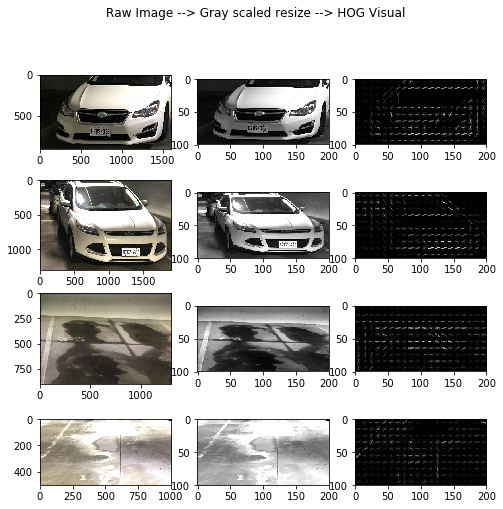

In [162]:
lbls = []
preds = []
r_imgs = []
gray_rs = []
hog_imgs = []

for car_img in car_imgs:
    pred, r_im, gray, hog_im = predict_im(car_img)
    lbls.append(True)
    preds.append(bool(pred))
    r_imgs.append(r_im)
    gray_rs.append(gray)
    hog_imgs.append(hog_im)

for ncar_img in ncar_imgs:
    pred, r_im, gray, hog_im = predict_im(ncar_img)
    lbls.append(False)
    preds.append(bool(pred))
    r_imgs.append(r_im)       
    gray_rs.append(gray)
    hog_imgs.append(hog_im)
    
    
#plot:

f, ax = plt.subplots(4, 3, figsize=(8, 8))
f.suptitle('Raw Image --> Gray scaled resize --> HOG Visual')

ax[0,0].imshow(r_imgs[0], cmap="gray")
ax[0,1].imshow(gray_rs[0], cmap="gray")
ax[0,2].imshow(hog_imgs[0], cmap="gray")


ax[1,0].imshow(r_imgs[18], cmap="gray")
ax[1,1].imshow(gray_rs[18], cmap="gray")
ax[1,2].imshow(hog_imgs[18], cmap="gray")

ax[2,0].imshow(r_imgs[38], cmap="gray")
ax[2,1].imshow(gray_rs[38], cmap="gray")
ax[2,2].imshow(hog_imgs[38], cmap="gray")
                
ax[3,0].imshow(r_imgs[45], cmap="gray")
ax[3,1].imshow(gray_rs[45], cmap="gray")
ax[3,2].imshow(hog_imgs[45], cmap="gray")


Prediction:  True  lbl:  True


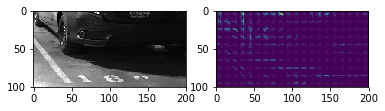

In [128]:
predict_im(car_imgs[1], True)

Prediction:  False  lbl:  False


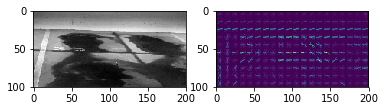

In [129]:
predict_im(ncar_imgs[0], False)

Prediction:  False  lbl:  False


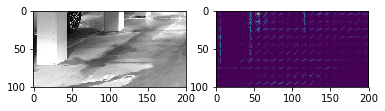

In [130]:
predict_im(ncar_imgs[1], False)

Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  True  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False
Prediction:  False  lbl:  False


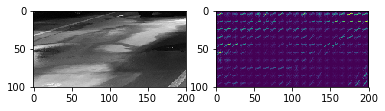

In [137]:
for ncar_img in ncar_imgs:
    predict_im(ncar_img, False)